# Project_4: Diabetes

In [86]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
df = pd.read_csv(Path("../Resources/diabetes_prediction_dataset.csv"))



df.head()




,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [90]:
df.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [71]:
df=df.drop_duplicates()

In [72]:

# map out gender into a binary form
binary_mapping = {'Female':1,'Male':0,'Other':3}
df['gender'] = df['gender'].map(binary_mapping)

# Predict Daibetes Risk based off the factors given using a linear regression model

In [73]:
y = df['diabetes']
columns_to_exclude = ['diabetes','smoking_history']
X = df.drop(columns= columns_to_exclude)


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(72109, 7)

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [76]:
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=1)

In [77]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9586459387871139
Testing Data Score: 0.9593543287431876


In [78]:
# Prediction

predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [79]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.9593543287431876

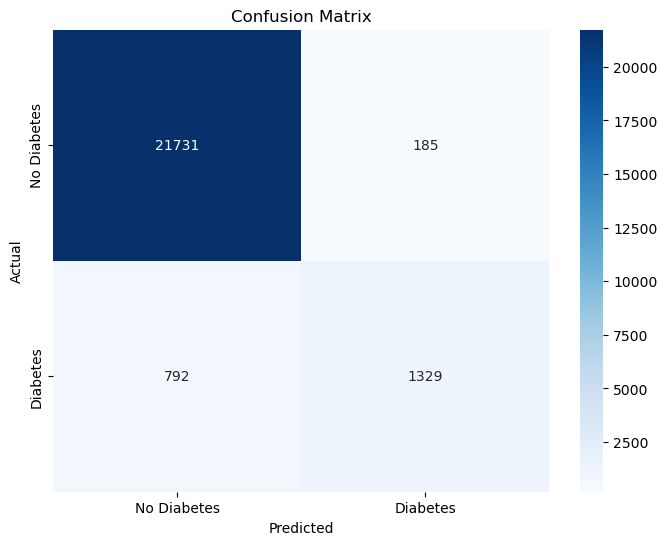

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predictions)


label_names = ['No Diabetes','Diabetes']
confusion_matrix_df = pd.DataFrame(confusion_matrix,index=label_names,columns = label_names)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [87]:
from sklearn.metrics import classification_report
target_names = ["No Diabetes ", "Diabetes"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

No Diabetes        0.96      0.99      0.98     21916
    Diabetes       0.88      0.63      0.73      2121

    accuracy                           0.96     24037
   macro avg       0.92      0.81      0.85     24037
weighted avg       0.96      0.96      0.96     24037

